<a href="https://colab.research.google.com/github/nayyen/NaylaHana-Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Decision Tree**

Nama Anggota :    


1.   Nayla Raihaanah Nabilah Hakim (24523010)
2.   Raihana Salwa Hafizhah (24523072)



> Menggunakan Diabetes Dataset dari Kaggle :  https://www.kaggle.com/datasets/mathchi/diabetes-data-set








# **1. Mengimport libraries yang dibutuhkan**



In [26]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# **2. Load Data**

disini kita akan load Dataset menggunakan function pada panda yaitu pd.read_csv (karena kita menggunakan data berformat csv)

In [27]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
# load dataset
data = pd.read_csv("diabetes.csv")

# Assign column names
data.columns = col_names

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **3.Feature Selection**

disini kita akan membagi kolom-kolom yang ada menjadi dua variabel, yaitu variabel dependent(label nya, kalau di data ini kita pakai yang outcome) dan variabel independent(berisi fitur-fitur yang ada)


In [28]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Age', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree']
X = data[feature_cols] # Features
y = data.Outcome # Target variable


# **4. Membagi Data (Splitting Data)**

Untuk memahami performa model, membagi dataset menjadi data latih (training set) dan data uji (test set) adalah strategi yang baik. Mari kita bagi dataset menggunakan fungsi train_test_split(). Anda perlu memasukkan tiga parameter: fitur (features), target, dan ukuran test set.


Penjelasan: Proses ini seperti belajar untuk ujian. Data latih digunakan untuk "mengajari" model mengenali pola, sedangkan data uji digunakan untuk "menguji" apakah model sudah benar-benar paham atau hanya menghafal. Dengan memisahkan data, kita bisa memastikan model tidak hanya bagus di data yang sudah dilihat, tapi juga bisa memprediksi data baru dengan baik. Parameter test_size menentukan proporsi pembagian (misalnya 0.2 berarti 20% untuk uji, 80% untuk latih), sedangkan random_state memastikan hasil pembagian konsisten setiap kali dijalankan.

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# **5. Membuat Model Decision Tree**

disini kita akan membuat model decision tree menggunakan Scikit-learn

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# **6. Evaluasi Model (Evaluating the Model)**

Untuk mengetahui seberapa baik model bekerja, kita perlu menghitung akurasi dengan fungsi accuracy_score.

Nilai akurasi diperoleh dari perbangdingan antara hasil prediksi model (y_pred) dan nilai sebenarnya pada data uji (y_test).

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.70995670995671


# **7. Visualizing Decision Trees**

Kita bisa menampilkan pohon keputusan langsung di jupyter Notebook menggunakan fungsi export_graphviz dari Scikit-learn.

Untuk menampilkannya, pastikan pustaka graphviz dan pydotplus sudah terinstal dengan perintah:
pip install graphviz
pip install pydotplus

Fungsi export_graphviz akan mengubah model decision tree menjadi file .dot lalu pydotplus akan mengonversi file tersebut menjadi gambar (.png) agar bisa ditampilkan di notebook.

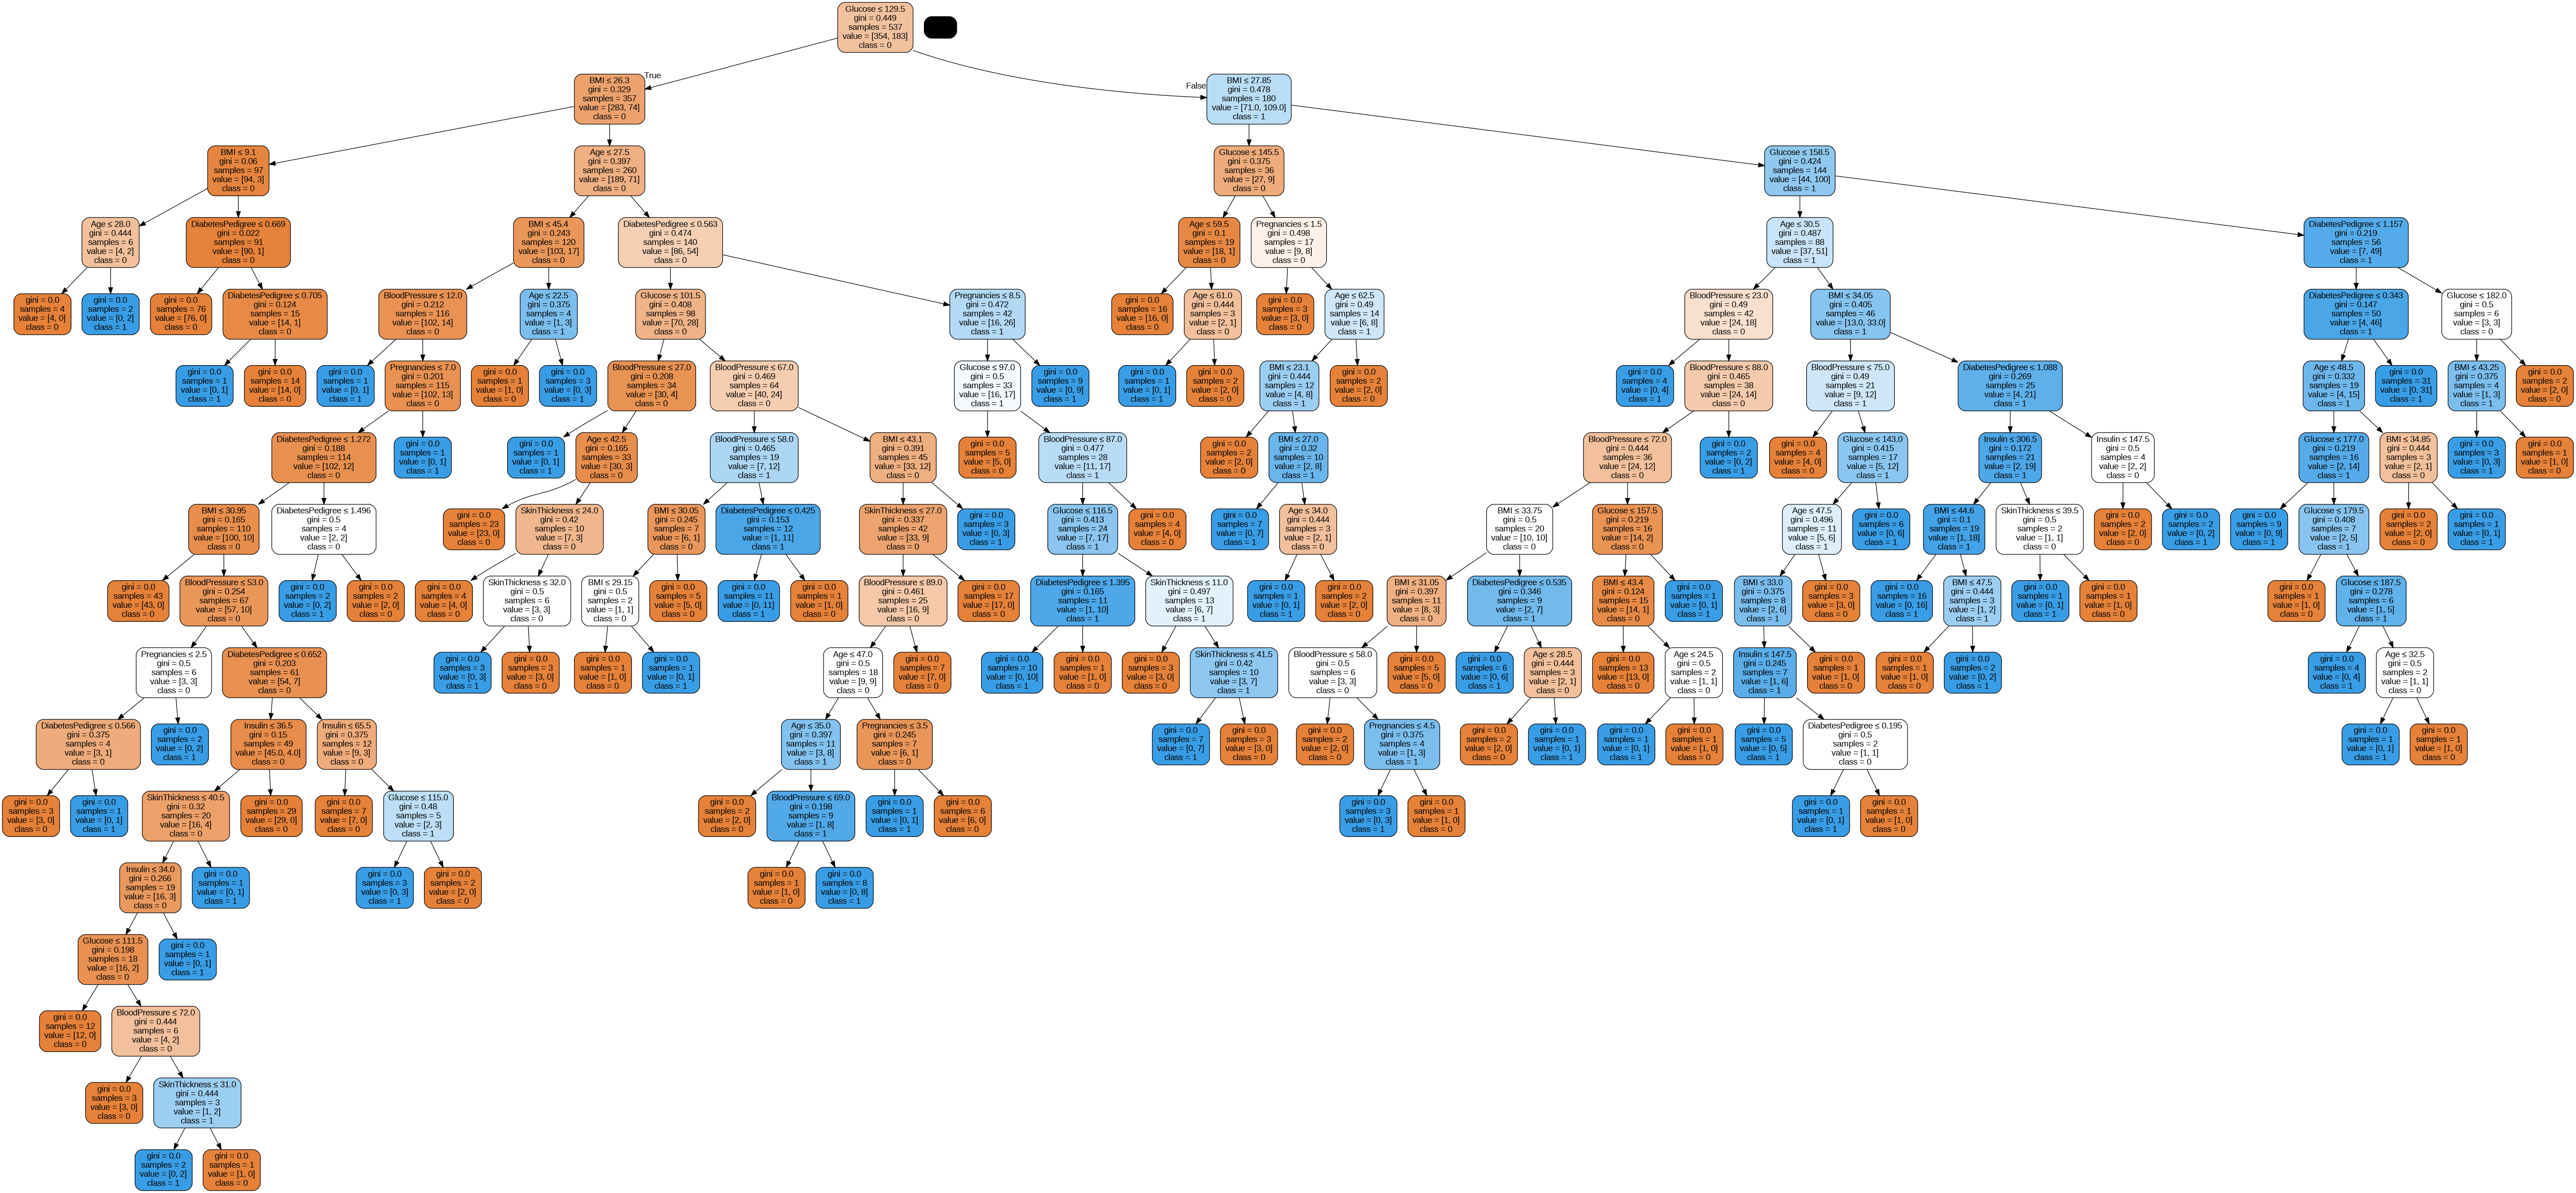

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())



>Pohon keputusan yang dihasilkan saat ini masih belum dipangkas. Karena belum dipangkas, strukturnya masih terlalu rumit dan sulit untuk dijelaskan.

>Di bagian berikutnya, kita akan mencoba mengoptimalkan pohon dengan melakukan pruning agar lebih sederhana dan mudah dipahami.





# **8. Optimizing Decision Tree Performance**



*   criterion : opsional (nilai default=”gini”) -- digunakan untuk menentukan ukuran pemilihan atribut (attribute selection measure).
Parameter ini memungkinkan kita memilih metode yang berbeda dalam menentukan kualitas pemisahan (split).
Nilai yang didukung ada:
> "gini" untuk menggunakan indeks Gini
> "entropy" untuk menggunakan information gain.

* splitter : string, opsional (nilai default=”best”) -- digunakan untuk menetukan strategi pemisahan data.
Parameter ini memungkinkan kita memilih strategi pemisahan yang digunakan saat membangun pohon keputusan.
Nilai yang digunakan ada:
> "best" untuk memilih pemisahan terbaik berdasarkan kriteria ynag dipilih
> "random" untuk memilih pemisahan terbaik secara acak.

* max_depth : int atau None, opsional (nilai default=None) -- digunakan untuk menentukan kedalaman maksimum pohon keputusan.
Jika diatur ke none, maka node akan terus dikembangkan hingga setiap daun memiliki jumlah sampel yang lebih sedikit dari nilai min_samples_split.
Nilai max_depth yang terlalu besar dapat menyebabkan overfitting, sedangkan nilai yang terlalu kecil dapat menyebabkan underfitting.

Dalam Scikit-learn, proses optimasi pada Decision Tree Classifier dilakukan melalui pre-pruning (pemangkasan awal).
Parameter max_depth dapat digunakan sebagai variabel kontrol untuk proses pre-pruning ini.
Sebagai contoh, kita dapat memvisualisasikan pohon keputusan pada data yang sama dengan pengaturan max_depth = 3.
Selain itu, kita juga dapat mencoba menggunakan kriteria pemilihan atribut lain, seperti entropy untuk membandingkan hasilnya.

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706




> Hasil menunjukkan bahwa tingkat akurasi klasifikasi meningkat menjadi 77.05%, sehingga performa model ini lebih baik dibandingkan model sebelumnya.



# **9. Visualizing Decision Trees**

Selanjutnya, mari kita buat pohon keputusan menjadi lebih mudah dipahami dengan menjalankan kode berikut :

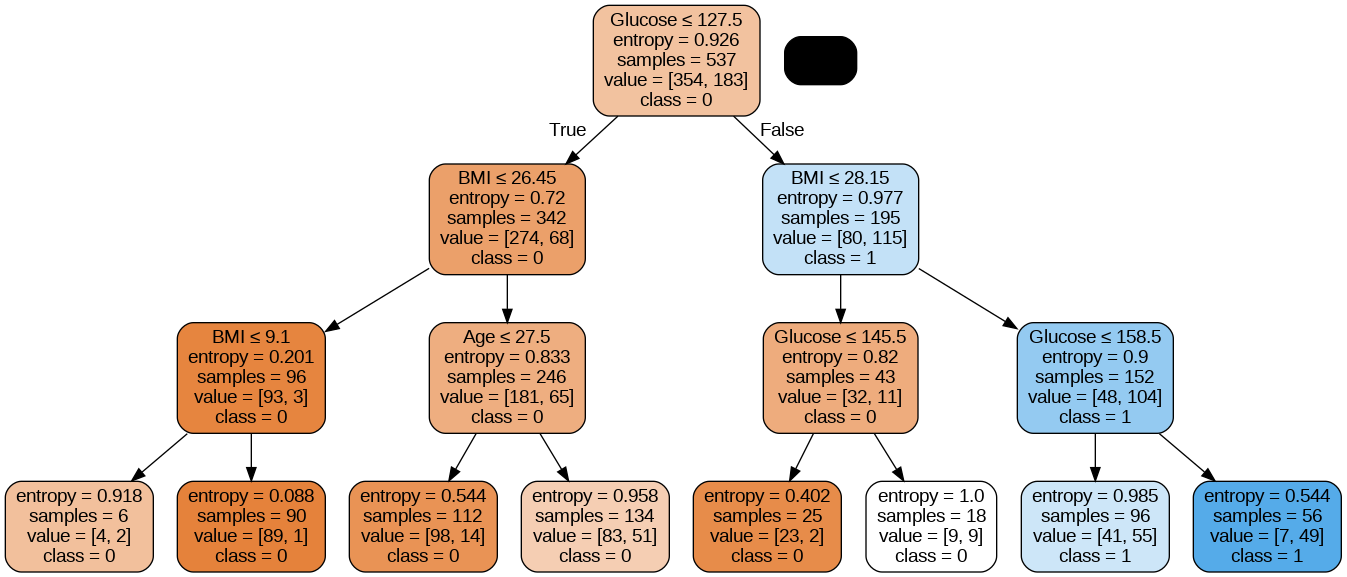

In [34]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Penjelasan Langkah-langkah :     


* Mengimpor library yang dibutuhkan.
Pertama, kita mengimpor semua library yang diperlukan untuk membuat dan menampilkan Decision Tree.
* Membuat objek StringIO bernama dot_data.
Objek ini berfungsi untuk menyimpan representasi teks dari Decision Tree dalam format .dot
* Mengekspor model Decision tree ke format .dot
menggunakan fungsi export_graphviz, Decision Tree dikonversi ke format .dot lalu hasilnya disimpan ke dalam buffer dot_data.
* Membuat objek grafik dengan pydotplus.
Dari data dalam format .dot, kita membentuk objek grafik (graph object) menggunakan pydotplus agar bisa divisualisasikan.
* Menyimpan hasil grafik ke file PNG.
Grafik Decision Tree yang sudah dibuat kemudian disimpan ke dalam file bernama "diabetes.png".
* Menampilkan gambar Decision Tree.
terakhir, kita menampilkan hasil visualisasi pohon keputusan tersebut di Jupyter Notebook menggunakan objek image dari modul IPython.display.


> Gambar Decision Tree diatas digunakan untuk memprediksi kemungkinan seseorang mengalami diabetes (class 1) atau tidak diabetes (class 2) berdasarkan beberapa variabel seperti Glucose,  BMI dan Age.
Dari Decision Tree di atas, pembagian data dimulai dari variabel Glucose, karena variabel ini paling berpengaruh terhadap hasil prediksi.

- Cabang kiri (Glucose ≤ 127.5) -- kecenderungan tidak diabetes.
Jika kadar glukosa seseorang kurang dari atau sama dengan 127.5, model akan menganggap orang tersebut cenderung tidak mengalami diabetes.
Setelah itu, data dibagi lagi berdasarkan BMI dan Age:
1. Jika BMI ≤ 26.45, kemungkinan besar tidak diabetes karena mayoritas data pada cabang ini adalah class 0. (contohnya, jika BMI sangat rendah (≤ 9.1), hampir semua individu tidak diabetes).
2. Jika BMI > 26.45, maka model akan melihat Age (jika age ≤ 27.5, masih banyak yang tidak diabetes; jika age > 27.5, mulai ada sedikit peningkatan resiko tapi tetap didominasi class 0).

- Cabang kanan (glucose > 127.5) -- kecenderungan diabetes.
Jika kadar glukosa seseorang lebih dari 127.5, model ini melihat variabel BMI sebagai faktor berikutnya.
1. Jika BMI ≤ 28.15, model masih memeriksa kembali kadar glukosa (jika glukosa ≤ 145.5, banyak kasus tidak diabetes; namun jika glukosa > 145.5, mulai lebih seimbang antara yang diabetes dan tidak).
2. Jika BMI > 28.15, artinya orang tersebut memiliki kadar glukosa dan BMI yang sama-sama tinggi -- hasilnya cenderung diabetes (misalnya, di node paling bawah kanan dari 56 orang, 49 termasuk class 1).

> Jadi dari hasil visualisasi Decision Tree menunjukkan bahwa kadar glukosa merupakan faktor utama dalam menentukan resiko diabetes. Individu dengan glukosa rendah (≤ 127.5) umumnya tergolong tidak diabetes, terutama yang memiliki BMI dan usia rendah. Sebaliknya, kadar glukosa tinggi (> 127.5) dan BMI tinggi (> 28.15) meningkatkan kemungkinan diabetes. Dengan demikian, kombinasi glukosa dan BMI menjadi penentu utama dalam prediksi diabetes.
